epoch:0, train acc:0.12, test acc:0.0998
epoch:1, train acc:0.143333333333, test acc:0.1093
epoch:2, train acc:0.18, test acc:0.1277
epoch:3, train acc:0.2, test acc:0.1344
epoch:4, train acc:0.21, test acc:0.1426
epoch:5, train acc:0.223333333333, test acc:0.1544
epoch:6, train acc:0.25, test acc:0.1626
epoch:7, train acc:0.256666666667, test acc:0.1691
epoch:8, train acc:0.293333333333, test acc:0.1833
epoch:9, train acc:0.306666666667, test acc:0.1918
epoch:10, train acc:0.343333333333, test acc:0.2134
epoch:11, train acc:0.34, test acc:0.2156
epoch:12, train acc:0.366666666667, test acc:0.2282
epoch:13, train acc:0.376666666667, test acc:0.2364
epoch:14, train acc:0.39, test acc:0.2475
epoch:15, train acc:0.39, test acc:0.259
epoch:16, train acc:0.406666666667, test acc:0.2663
epoch:17, train acc:0.423333333333, test acc:0.2761
epoch:18, train acc:0.443333333333, test acc:0.289
epoch:19, train acc:0.453333333333, test acc:0.2942
epoch:20, train acc:0.47, test acc:0.3145
epoch:21, t

epoch:167, train acc:0.86, test acc:0.659
epoch:168, train acc:0.87, test acc:0.6603
epoch:169, train acc:0.873333333333, test acc:0.6611
epoch:170, train acc:0.866666666667, test acc:0.6607
epoch:171, train acc:0.87, test acc:0.6604
epoch:172, train acc:0.863333333333, test acc:0.6731
epoch:173, train acc:0.853333333333, test acc:0.6718
epoch:174, train acc:0.873333333333, test acc:0.6655
epoch:175, train acc:0.866666666667, test acc:0.6693
epoch:176, train acc:0.873333333333, test acc:0.6625
epoch:177, train acc:0.87, test acc:0.6609
epoch:178, train acc:0.87, test acc:0.661
epoch:179, train acc:0.88, test acc:0.6727
epoch:180, train acc:0.86, test acc:0.662
epoch:181, train acc:0.883333333333, test acc:0.6656
epoch:182, train acc:0.88, test acc:0.6674
epoch:183, train acc:0.876666666667, test acc:0.6673
epoch:184, train acc:0.876666666667, test acc:0.6646
epoch:185, train acc:0.87, test acc:0.6515
epoch:186, train acc:0.866666666667, test acc:0.6606
epoch:187, train acc:0.8733333333

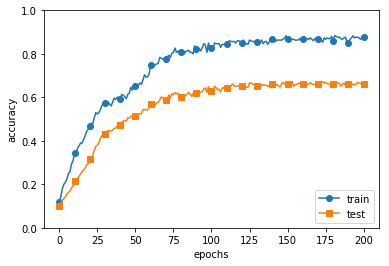

In [1]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.0966666666667, test acc:0.0902
epoch:1, train acc:0.09, test acc:0.0925
epoch:2, train acc:0.0966666666667, test acc:0.1021
epoch:3, train acc:0.12, test acc:0.1144
epoch:4, train acc:0.14, test acc:0.1298
epoch:5, train acc:0.183333333333, test acc:0.1517
epoch:6, train acc:0.206666666667, test acc:0.1768
epoch:7, train acc:0.236666666667, test acc:0.2012
epoch:8, train acc:0.26, test acc:0.2188
epoch:9, train acc:0.286666666667, test acc:0.2351
epoch:10, train acc:0.293333333333, test acc:0.2516
epoch:11, train acc:0.323333333333, test acc:0.2617
epoch:12, train acc:0.333333333333, test acc:0.2723
epoch:13, train acc:0.356666666667, test acc:0.2861
epoch:14, train acc:0.386666666667, test acc:0.2998
epoch:15, train acc:0.396666666667, test acc:0.3097
epoch:16, train acc:0.42, test acc:0.3189
epoch:17, train acc:0.42, test acc:0.3311
epoch:18, train acc:0.433333333333, test acc:0.3399
epoch:19, train acc:0.45, test acc:0.3543
epoch:20, train acc:0.463333333333, te

epoch:167, train acc:0.85, test acc:0.7084
epoch:168, train acc:0.85, test acc:0.699
epoch:169, train acc:0.853333333333, test acc:0.7032
epoch:170, train acc:0.853333333333, test acc:0.7051
epoch:171, train acc:0.846666666667, test acc:0.7045
epoch:172, train acc:0.846666666667, test acc:0.7069
epoch:173, train acc:0.843333333333, test acc:0.7049
epoch:174, train acc:0.86, test acc:0.7046
epoch:175, train acc:0.853333333333, test acc:0.7116
epoch:176, train acc:0.85, test acc:0.7092
epoch:177, train acc:0.843333333333, test acc:0.702
epoch:178, train acc:0.843333333333, test acc:0.6942
epoch:179, train acc:0.846666666667, test acc:0.6977
epoch:180, train acc:0.853333333333, test acc:0.7015
epoch:181, train acc:0.853333333333, test acc:0.699
epoch:182, train acc:0.85, test acc:0.7031
epoch:183, train acc:0.853333333333, test acc:0.7096
epoch:184, train acc:0.846666666667, test acc:0.7057
epoch:185, train acc:0.85, test acc:0.7096
epoch:186, train acc:0.85, test acc:0.7012
epoch:187, tr

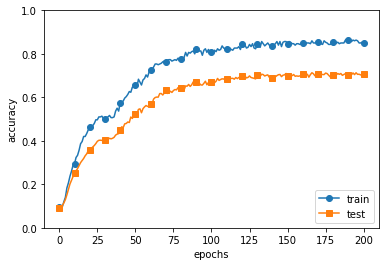

In [2]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()